# Data Preprocessing

- 0 coupe
- 1 pickup
- 2 sedan
- 3 suv
- 4 van

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HH9ECnEeBwB663gIBlcY")
project = rf.workspace("ana-lowela-l--lucas").project("vehicle-classification-sgcum")
version = project.version(11)
dataset = version.download("tensorflow")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to VEHICLE-CLASSIFICATION-11 in tensorflow:: 100%|██████████| 11983/11983 [00:02<00:00, 4783.32it/s]


### -

In [ ]:
import os
import numpy as np
import pandas as pd
# Define the path to the folder containing images and corresponding .txt files
folder_path_train = "/content/VEHICLE-CLASSIFICATION-11/train/"
folder_path_test = "/content/VEHICLE-CLASSIFICATION-11/test/"
df = pd.read_csv('/content/VEHICLE-CLASSIFICATION-11/train/_annotations.csv')
df_test = pd.read_csv('/content/VEHICLE-CLASSIFICATION-11/test/_annotations.csv')
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,04142_jpg.rf.60c4a33469a29c11a7244ef0369e5a33.jpg,260,194,suv,25,38,209,170
1,06209_jpg.rf.60c5f510889740f7feaaa7f2977835bf.jpg,640,480,pickup,15,205,632,471
2,01222_jpg.rf.60c99dc6d37915540106dd40d6dd51de.jpg,640,480,van,19,65,596,347
3,07117_jpg.rf.60d6cb04a7d6c0da5e775cfa6e7cd925.jpg,424,360,sedan,15,90,417,281
4,05243_jpg.rf.60e3bcaae25e2904694bf671cb8a9d92.jpg,112,84,van,2,15,110,83


In [ ]:
import cv2
import os
data = []
for filename in os.listdir(folder_path_train):
    if filename.endswith('.jpg'):
        image_path = os.path.join(folder_path_train, filename)
        image = cv2.imread(image_path)  #Reading the image
        data.append(image)


In [ ]:
data = data[:10490]

In [ ]:
len(data)

10490

In [ ]:
labels = df['class']
len(labels)

10490

In [ ]:
data[0].shape

(800, 1200, 3)

In [ ]:
labels[95]

'pickup'

In [ ]:
import numpy as np
for i in range(len(data)):
    data[i] = cv2.resize(data[i], (128, 128))

data_scaled_np = np.array(data)


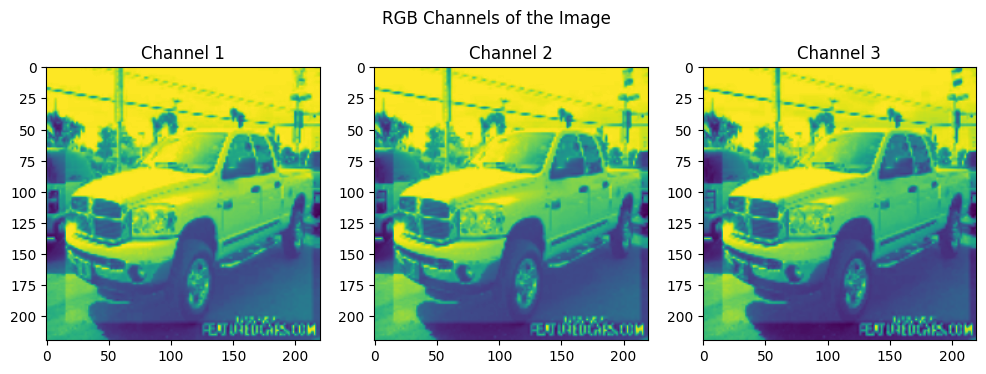

In [ ]:
import matplotlib.pyplot as plt

# Create dummy data for the image (you can replace this with your actual image data)
image_data = data[10489]

# Show subplots with three channels (shape: (1, 3))
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(image_data[:, :, i], cmap='viridis')  # Display each channel
    plt.title(f'Channel {i + 1}')

plt.suptitle('RGB Channels of the Image')
plt.show()

In [ ]:
# Converting Labels to integer values
class_names = [
    'coupe',
    'pickup',
    'sedan',
    'suv',
    'van'
]

class_encoded = {
    class_name : i for i, class_name in enumerate(class_names)
}
print(class_encoded)


{'coupe': 0, 'pickup': 1, 'sedan': 2, 'suv': 3, 'van': 4}


In [ ]:
labels_encoded = [class_encoded[i] for i in labels]

In [ ]:
labels[10489]

'pickup'

In [ ]:
labels_encoded[88]

1

In [ ]:
len(data)

10490

In [ ]:
len(labels_encoded)

10490

In [ ]:
# Scaling all images to 128,128,3
# Converting data and labels to numpy arrays
# import cv2
# import numpy as np
# for i in range(len(data)):
#     data[i] = cv2.resize(data[i], (128, 128))

data_scaled_np = np.array(data)
labels_encoded_np = np.array(labels_encoded)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data_scaled_np, labels_encoded_np, test_size=0.2, random_state=44)
X_train = data_scaled_np
y_train = labels_encoded_np

In [ ]:
# Flatten the image data into 1D arrays as the classifier performs best on 1D arrays
X_train_flat = X_train.reshape(X_train.shape[0], -1)
#


### Test

In [ ]:
import cv2
import os
data_test = []
for filename in os.listdir(folder_path_test):
    if filename.endswith('.jpg'):
        image_path = os.path.join(folder_path_test, filename)
        image = cv2.imread(image_path)  #Reading the image
        data_test.append(image)


In [ ]:
import numpy as np
for i in range(len(data_test)):
    data_test[i] = cv2.resize(data_test[i], (128, 128))

data_test_scaled_np = np.array(data_test)


In [ ]:
labels_test = df_test['class']
labels_test.head()

0    pickup
1       van
2       van
3       van
4       van
Name: class, dtype: object

In [ ]:
labels_encoded_test = [class_encoded[i] for i in labels_test]

In [ ]:
len(data_test_scaled_np)

503

In [ ]:
labels_encoded_test_np = np.array(labels_encoded_test)
len(labels_encoded_test_np)

503

In [ ]:
X_test = data_test_scaled_np
y_test = labels_encoded_test_np

In [ ]:
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# SVM

In [ ]:
from sklearn.svm import SVC
import time
# Create an SVM classifier
svm = SVC(max_iter=1000)

# Train the SVM classifier
start_time = time.time()
svm.fit(X_train_flat, y_train)
end_time = time.time()
# Predict  for the test data
y_pred = svm.predict(X_test_flat)



SVM_time = end_time - start_time



# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics and execution time
print("Accuracy:", accuracy)
print("Execution Time:", SVM_time)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.20874751491053678
Execution Time: 1788.3508026599884


In [ ]:
X_train_red = X_train_flat[:100]
y_train_red = y_train[:100]
q=svm.predict(X_train_red)
accuracy_score(y_train_red,q)

0.27

# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier


DecisionTrees = DecisionTreeClassifier()

start_time = time.time()
DecisionTrees.fit(X_train_flat, y_train)
end_time = time.time()
# Predict  for the test data
y_pred = DecisionTrees.predict(X_test_flat)

execution_time = end_time - start_time
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)


# Print the evaluation metrics and execution time
print("Accuracy:", accuracy)

print("Execution Time:", execution_time)

Accuracy: 0.16898608349900596
Execution Time: 719.9828917980194


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time
# Create an Random Forest classifier
RandomForest = RandomForestClassifier(n_estimators=20)

# Train the Random Forest classifier
start_time = time.time()
RandomForest.fit(X_train_flat, y_train)
end_time = time.time()
# Predict  for the test data
y_pred = RandomForest.predict(X_test_flat)

execution_time = end_time - start_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics and execution time
print("Accuracy:", accuracy)
print("Execution Time:", execution_time)

Accuracy: 0.19284294234592445
Execution Time: 70.09388256072998


# Gradient Boosting Decision Trees

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Create an Random Forest classifier

GB = GradientBoostingClassifier()

# Train the Random Forest classifier
start_time = time.time()
GB.fit(X_train_flat, y_train)
end_time = time.time()
# Predict  for the test data
y_pred = GB.predict(X_test_flat)

execution_time = end_time - start_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics and execution time
print("Accuracy:", accuracy)

print("Execution Time:", execution_time)